In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_diabetes

from src.config import DADOS_TRATADOS

sns.set_theme(palette="bright")

In [4]:
dados = load_diabetes(as_frame=True, scaled=False)

dados

{'data':       age  sex   bmi      bp     s1     s2    s3    s4      s5     s6
 0    59.0  2.0  32.1  101.00  157.0   93.2  38.0  4.00  4.8598   87.0
 1    48.0  1.0  21.6   87.00  183.0  103.2  70.0  3.00  3.8918   69.0
 2    72.0  2.0  30.5   93.00  156.0   93.6  41.0  4.00  4.6728   85.0
 3    24.0  1.0  25.3   84.00  198.0  131.4  40.0  5.00  4.8903   89.0
 4    50.0  1.0  23.0  101.00  192.0  125.4  52.0  4.00  4.2905   80.0
 ..    ...  ...   ...     ...    ...    ...   ...   ...     ...    ...
 437  60.0  2.0  28.2  112.00  185.0  113.8  42.0  4.00  4.9836   93.0
 438  47.0  2.0  24.9   75.00  225.0  166.0  42.0  5.00  4.4427  102.0
 439  60.0  2.0  24.9   99.67  162.0  106.6  43.0  3.77  4.1271   95.0
 440  36.0  1.0  30.0   95.00  201.0  125.2  42.0  4.79  5.1299   85.0
 441  36.0  1.0  19.6   71.00  250.0  133.2  97.0  3.00  4.5951   92.0
 
 [442 rows x 10 columns],
 'target': 0      151.0
 1       75.0
 2      141.0
 3      206.0
 4      135.0
        ...  
 437    178.0
 438

In [5]:
dados.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [6]:
print(dados["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [7]:
df = dados["frame"]

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


In [8]:
novos_nomes = {
    "age": "idade",
    "sex": "sexo",
    "bmi": "imc",
    "bp": "pressao_media",
    "s1": "colesterol_total",
    "s2": "ldl",
    "s3": "hdl",
    "s4": "colesterol_hdl",
    "s5": "triglicerides",
    "s6": "glicose",
    "target": "target"
}

df = df.rename(columns=novos_nomes)

df.head()

,idade,sexo,imc,pressao_media,colesterol_total,ldl,hdl,colesterol_hdl,triglicerides,glicose,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idade             442 non-null    float64
 1   sexo              442 non-null    float64
 2   imc               442 non-null    float64
 3   pressao_media     442 non-null    float64
 4   colesterol_total  442 non-null    float64
 5   ldl               442 non-null    float64
 6   hdl               442 non-null    float64
 7   colesterol_hdl    442 non-null    float64
 8   triglicerides     442 non-null    float64
 9   glicose           442 non-null    float64
 10  target            442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [10]:
df.describe()

,idade,sexo,imc,pressao_media,colesterol_total,ldl,hdl,colesterol_hdl,triglicerides,glicose,target
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


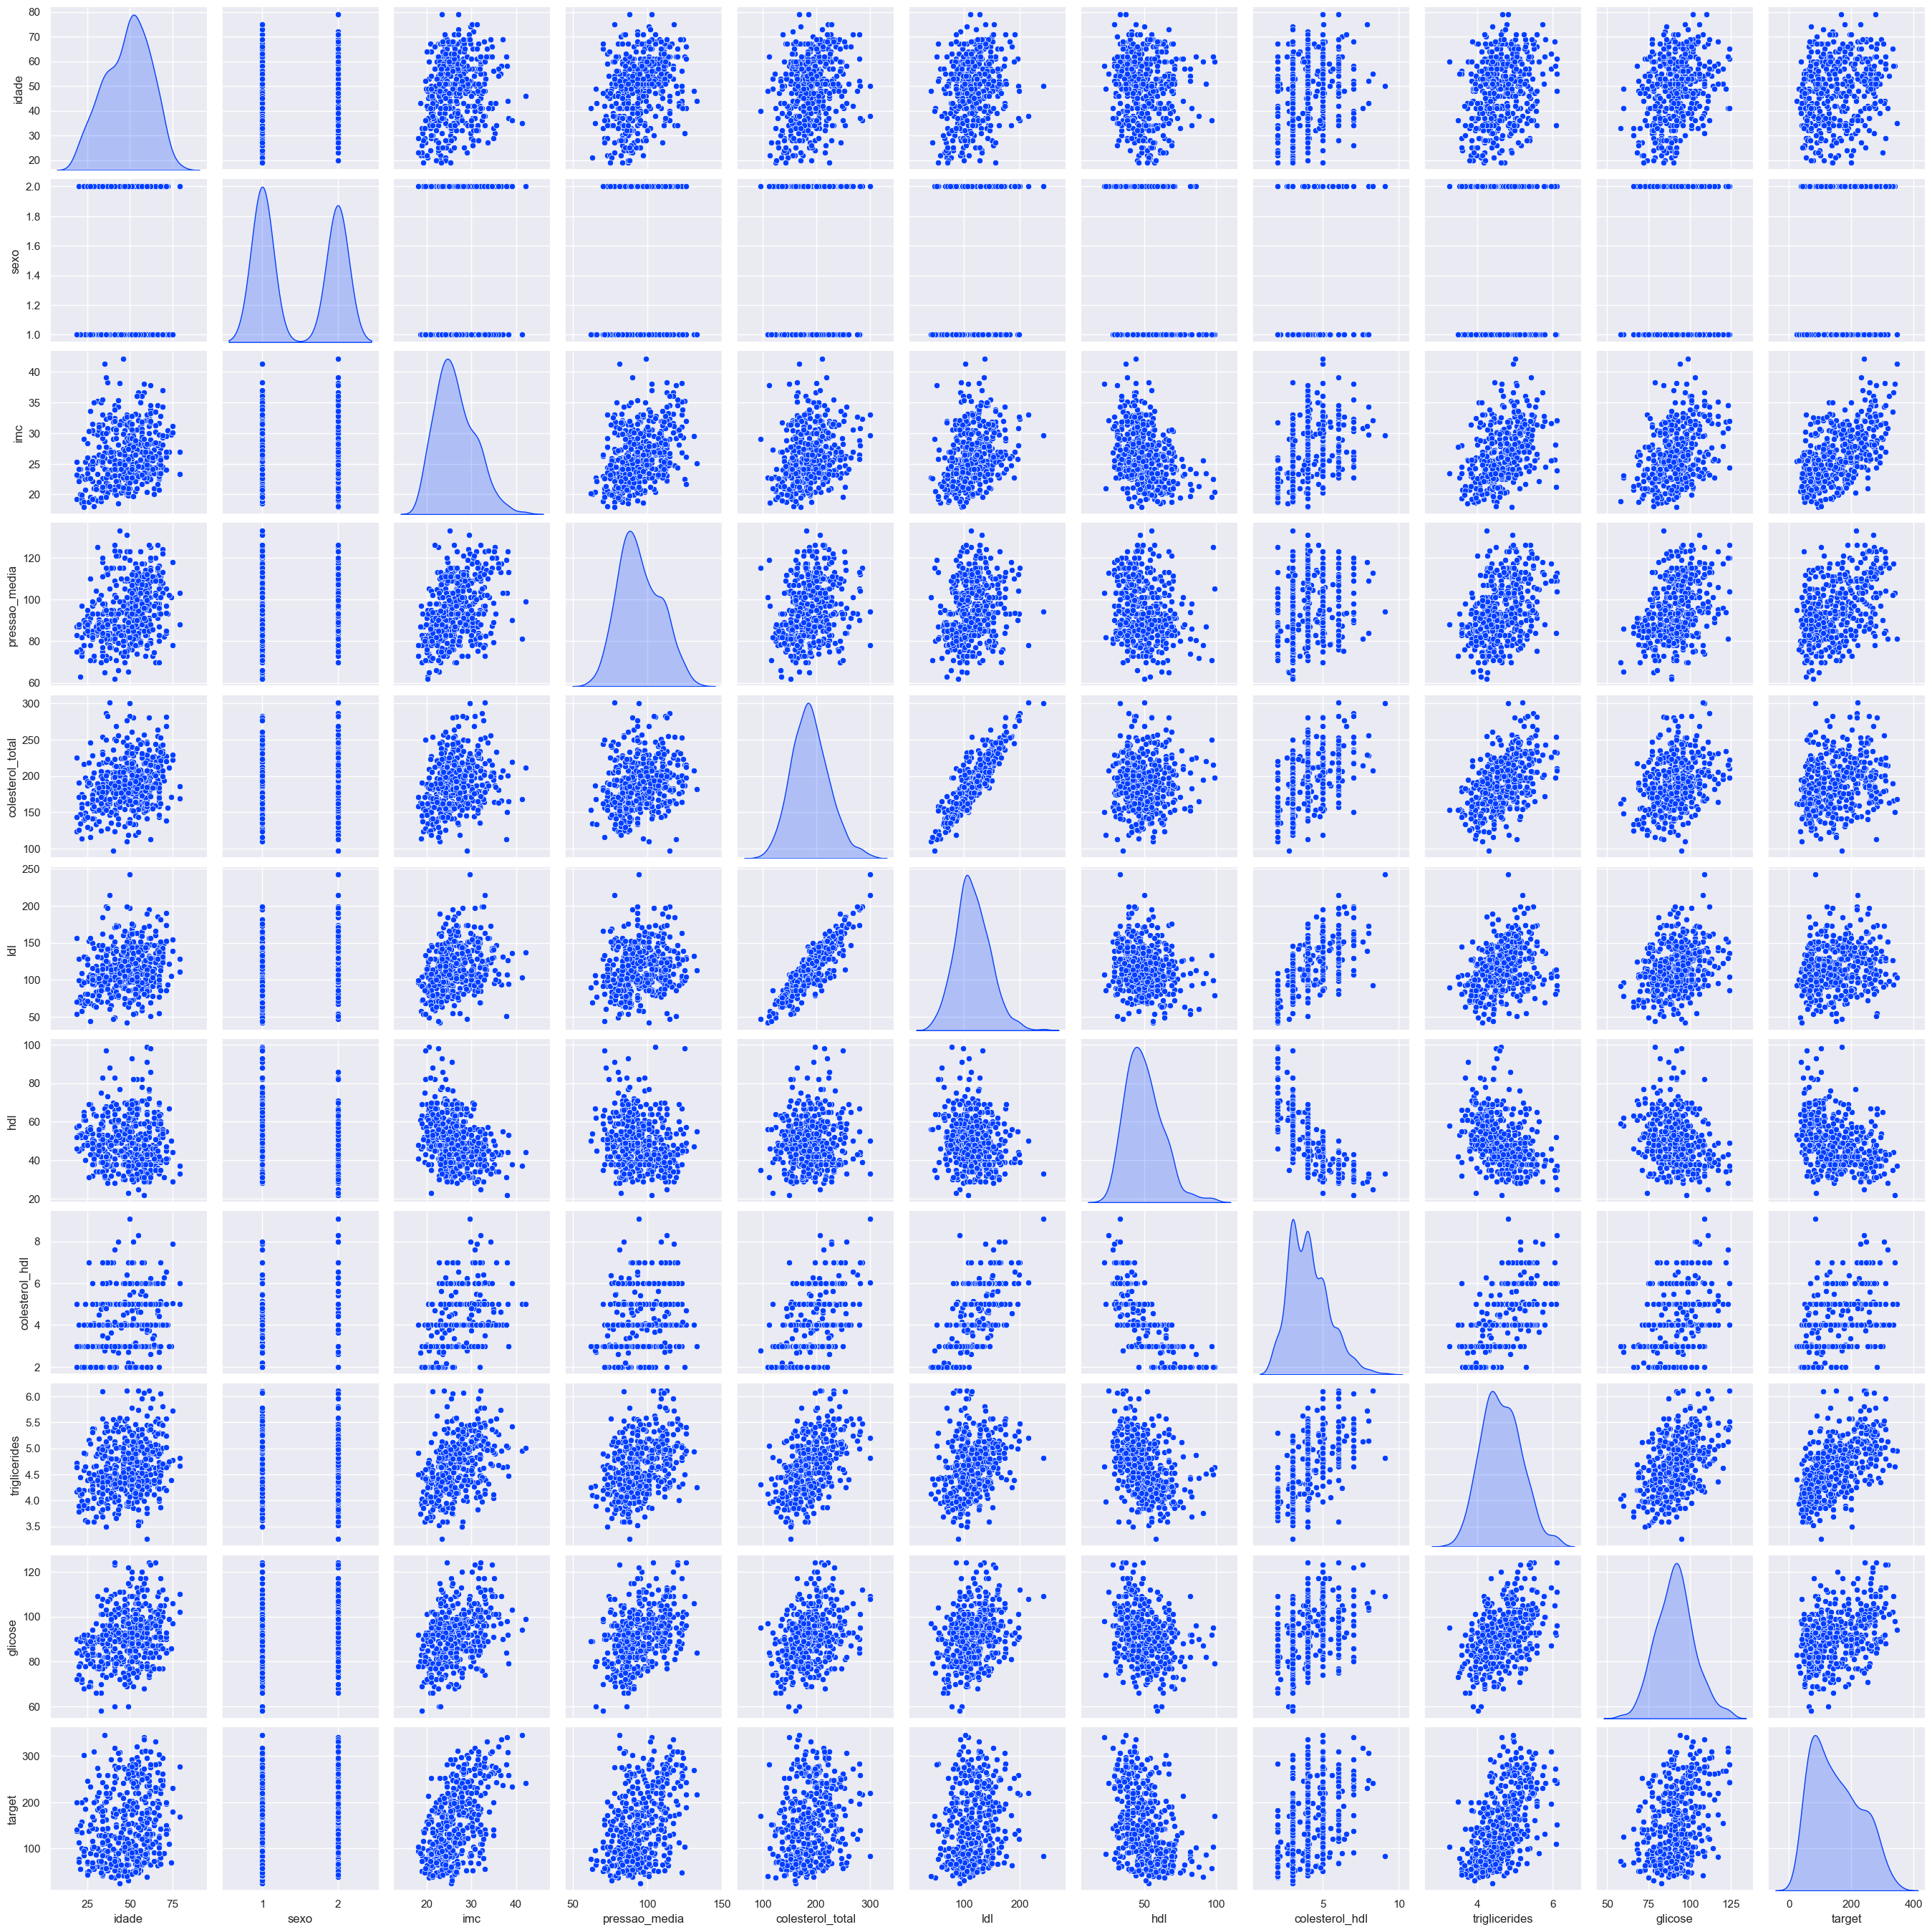

In [11]:
sns.pairplot(df, diag_kind="kde")

In [12]:
df["colesterol_hdl"].value_counts()

colesterol_hdl
3.00    128
4.00    108
5.00     68
6.00     33
2.00     28
       ... 
5.63      1
3.40      1
4.70      1
3.77      1
4.79      1
Name: count, Length: 66, dtype: int64

In [13]:
(1.0).is_integer()

True

In [14]:
df["colesterol_hdl"].apply(lambda x: x.is_integer()).sum()

np.int64(380)

In [15]:
380 / df.shape[0]

0.8597285067873304

In [16]:
(df["colesterol_total"] / df["hdl"]).apply(lambda x: x.is_integer()).sum()

np.int64(19)

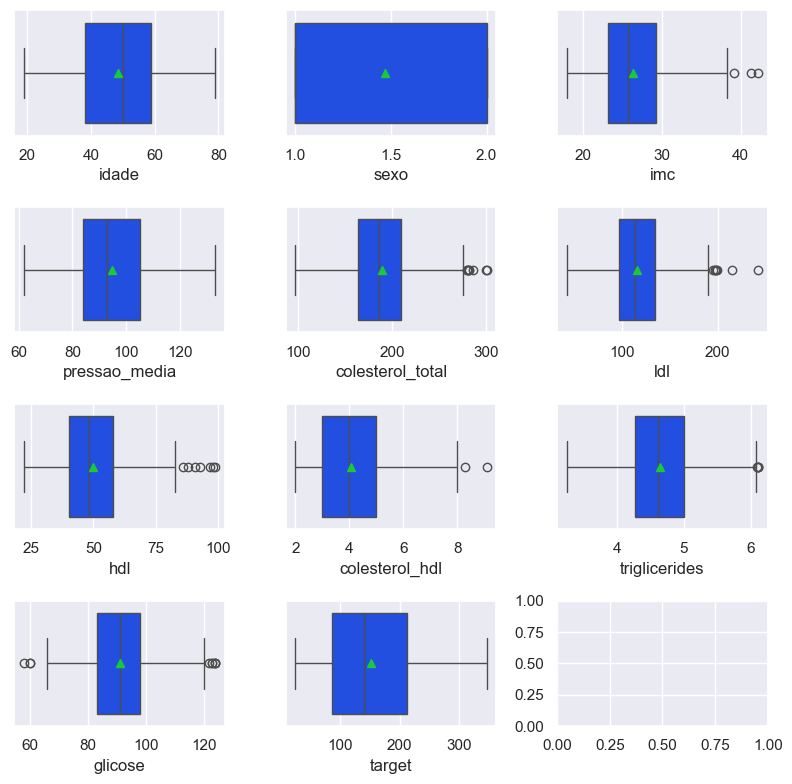

In [17]:
fig, axs = plt.subplots(4, 3, figsize=(8, 8))

for ax, coluna in zip(axs.flatten(), df.columns):
    sns.boxplot(
        x=df[coluna],
        ax=ax,
        showmeans=True,
    )

plt.tight_layout()

plt.show()

In [18]:
df.skew()

idade              -0.231382
sexo                0.127385
imc                 0.598148
pressao_media       0.290658
colesterol_total    0.378108
ldl                 0.436592
hdl                 0.799255
colesterol_hdl      0.735374
triglicerides       0.291754
glicose             0.207917
target              0.440563
dtype: float64

In [19]:
df.kurtosis()

idade              -0.671224
sexo               -1.992811
imc                 0.095094
pressao_media      -0.532797
colesterol_total    0.232948
ldl                 0.601381
hdl                 0.981507
colesterol_hdl      0.444402
triglicerides      -0.134367
glicose             0.236917
target             -0.883057
dtype: float64

In [20]:
df.corr()

,idade,sexo,imc,pressao_media,colesterol_total,ldl,hdl,colesterol_hdl,triglicerides,glicose,target
idade,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sexo,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
imc,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
pressao_media,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
colesterol_total,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
ldl,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
hdl,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
colesterol_hdl,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
triglicerides,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
glicose,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


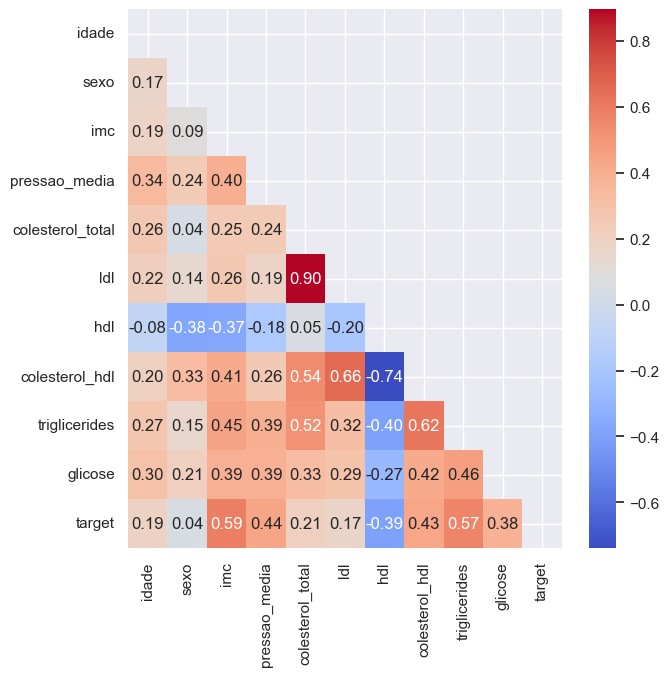

In [21]:
matriz = np.triu(df.corr())

fig, ax = plt.subplots(figsize=(7, 7))

sns.heatmap(df.corr(), mask=matriz, annot=True, fmt=".2f", ax=ax, cmap="coolwarm")

plt.show()

In [22]:
df.head()

,idade,sexo,imc,pressao_media,colesterol_total,ldl,hdl,colesterol_hdl,triglicerides,glicose,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


In [23]:
df.tail()

,idade,sexo,imc,pressao_media,colesterol_total,ldl,hdl,colesterol_hdl,triglicerides,glicose,target
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0
441,36.0,1.0,19.6,71.00,250.0,133.2,97.0,3.00,4.5951,92.0,57.0


In [24]:
all([False, False])

False

In [25]:
colunas_valores_inteiros = []

for coluna in df.columns:
    if df[coluna].apply(lambda x: x.is_integer()).all():
        colunas_valores_inteiros.append(coluna)

colunas_valores_inteiros

['idade', 'sexo', 'colesterol_total', 'glicose', 'target']

In [26]:
df[colunas_valores_inteiros] = df[colunas_valores_inteiros].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idade             442 non-null    int64  
 1   sexo              442 non-null    int64  
 2   imc               442 non-null    float64
 3   pressao_media     442 non-null    float64
 4   colesterol_total  442 non-null    int64  
 5   ldl               442 non-null    float64
 6   hdl               442 non-null    float64
 7   colesterol_hdl    442 non-null    float64
 8   triglicerides     442 non-null    float64
 9   glicose           442 non-null    int64  
 10  target            442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [27]:
df[colunas_valores_inteiros] = df[colunas_valores_inteiros].apply(
    pd.to_numeric,
    downcast="integer"
)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idade             442 non-null    int8   
 1   sexo              442 non-null    int8   
 2   imc               442 non-null    float64
 3   pressao_media     442 non-null    float64
 4   colesterol_total  442 non-null    int16  
 5   ldl               442 non-null    float64
 6   hdl               442 non-null    float64
 7   colesterol_hdl    442 non-null    float64
 8   triglicerides     442 non-null    float64
 9   glicose           442 non-null    int8   
 10  target            442 non-null    int16  
dtypes: float64(6), int16(2), int8(3)
memory usage: 23.9 KB


In [28]:
df.columns.difference(colunas_valores_inteiros)

Index(['colesterol_hdl', 'hdl', 'imc', 'ldl', 'pressao_media',
       'triglicerides'],
      dtype='object')

In [30]:
df[df.columns.difference(colunas_valores_inteiros)] = df[
    df.columns.difference(colunas_valores_inteiros)
].apply(pd.to_numeric, downcast="float")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idade             442 non-null    int8   
 1   sexo              442 non-null    int8   
 2   imc               442 non-null    float32
 3   pressao_media     442 non-null    float32
 4   colesterol_total  442 non-null    int16  
 5   ldl               442 non-null    float32
 6   hdl               442 non-null    float32
 7   colesterol_hdl    442 non-null    float32
 8   triglicerides     442 non-null    float32
 9   glicose           442 non-null    int8   
 10  target            442 non-null    int16  
dtypes: float32(6), int16(2), int8(3)
memory usage: 13.5 KB


In [33]:
df.to_parquet(DADOS_TRATADOS, index=False)